In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(".."))

#Setting Style for Plotting
plt.style.use('fivethirtyeight')

['Python', 'SQL']


In [5]:
df = pd.read_csv('Data/winePortugal.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10,5
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12,6


In [6]:
df.shape

(2037, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         2037 non-null   float64
 1   volatile_acidity      2037 non-null   float64
 2   citric_acid           2037 non-null   float64
 3   residual_sugar        2037 non-null   float64
 4   chlorides             2037 non-null   float64
 5   free_sulfur_dioxide   2037 non-null   float64
 6   total_sulfur_dioxide  2037 non-null   float64
 7   density               2037 non-null   float64
 8   pH                    2037 non-null   float64
 9   sulphates             2037 non-null   float64
 10  alcohol               2037 non-null   float64
 11  quality               2037 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 191.1 KB


In [17]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

fixed_acidity - 0.0%
volatile_acidity - 0.0%
citric_acid - 0.0%
residual_sugar - 0.0%
chlorides - 0.0%
free_sulfur_dioxide - 0.0%
total_sulfur_dioxide - 0.0%
density - 0.0%
pH - 0.0%
sulphates - 0.0%
alcohol - 0.0%
quality - 0.0%


### Checking for some messy values

In [29]:
print(df.alcohol.value_counts().index.to_list())

[9.5, 9.4, 11.0, 9.2, 9.0, 10.5, 10.0, 10.8, 9.6, 10.4, 9.1, 11.4, 10.2, 11.2, 9.8, 9.9, 12.0, 8.8, 11.3, 10.6, 9.3, 10.9, 9.7, 11.1, 11.5, 12.5, 10.7, 10.1, 12.4, 12.2, 8.9, 11.8, 10.3, 12.3, 12.6, 11.6, 12.1, 12.7, 12.8, 11.7, 12.9, 11.9, 8.7, 13.0, 13.4, 13.5, 8.5, 13.1, 13.6, 8.6, 13.2, 13.7, 11.45, 12.75, 13.3, 8.4, 11.75, 14.0, 11.05, 12.05, 11.35, 14.2, 10.98, 13.9, 9.55, 11.94, 11.65, 13.05, 10.55]


In [37]:
clean_dict = {
    '1.096.666.667':'11',
    '1.093.333.333':'10.9',
    '9.533.333.333':'9.5',
    '1.053.333.333':'10.5',
    '1.163.333.333':'11.6',
    '9.733.333.333':'9.7',
    '1.206.666.667':'12.1',
    '1.143.333.333':'11.4',
    '1.106.666.667':'11.1',
    '1.136.666.667':'11.4',
    '9.633.333.333':'9.6',
    '1.133.333.333':'11.3',
    '1.289.333.333':'12.9',
    '1.046.666.667':'10.5'
}

df.alcohol=df.alcohol.replace(clean_dict)
df.alcohol = pd.to_numeric(df.alcohol)

### Checking Current values

In [42]:
print(df.alcohol.value_counts().index)

Float64Index([  9.5,   9.4,  11.0,   9.2,   9.0,  10.5,  10.0,  10.8,   9.6,
               10.4,   9.1,  11.4,  10.2,  11.2,   9.8,   9.9,  12.0,   8.8,
               11.3,  10.6,   9.3,  10.9,   9.7,  11.1,  11.5,  12.5,  10.7,
               10.1,  12.4,  12.2,   8.9,  11.8,  10.3,  12.3,  12.6,  11.6,
               12.1,  12.7,  12.8,  11.7,  12.9,  11.9,   8.7,  13.0,  13.4,
               13.5,   8.5,  13.1,  13.6,   8.6,  13.2,  13.7, 11.45, 12.75,
               13.3,   8.4, 11.75,  14.0, 11.05, 12.05, 11.35,  14.2, 10.98,
               13.9,  9.55, 11.94, 11.65, 13.05, 10.55],
             dtype='float64')


In [57]:
print(df.quality.value_counts())

df.quality.value_counts().sort_index()

6    944
5    589
7    391
8     66
4     40
9      4
3      3
Name: quality, dtype: int64


3      3
4     40
5    589
6    944
7    391
8     66
9      4
Name: quality, dtype: int64

6    944
5    589
7    391
8     66
4     40
9      4
3      3
Name: quality, dtype: int64


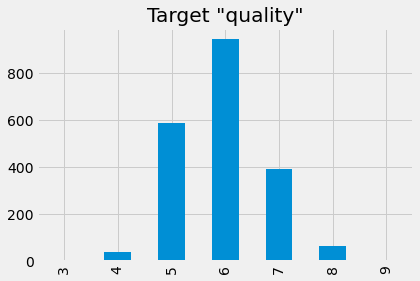

In [60]:
print(df.quality.value_counts())

df.quality.value_counts().sort_index().plot(kind='bar')
plt.title('Target "quality"')
#plt.grid()
plt.show()

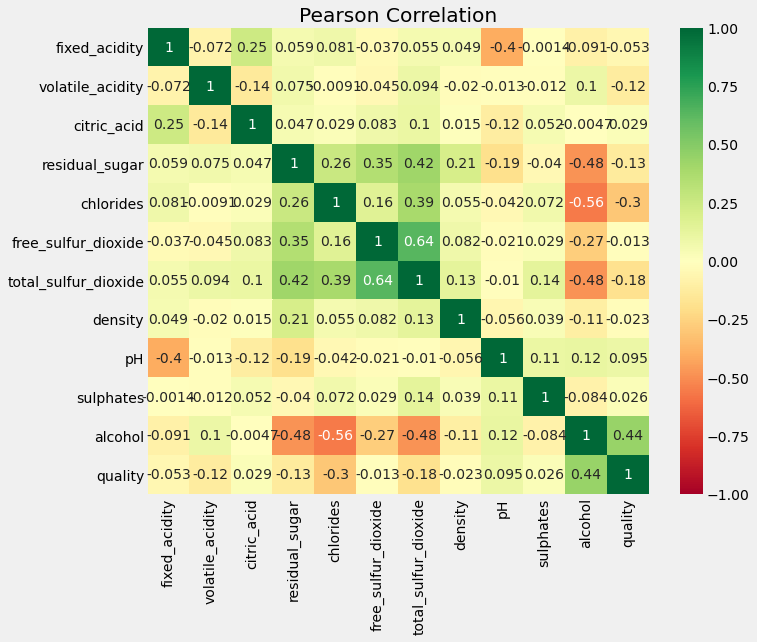

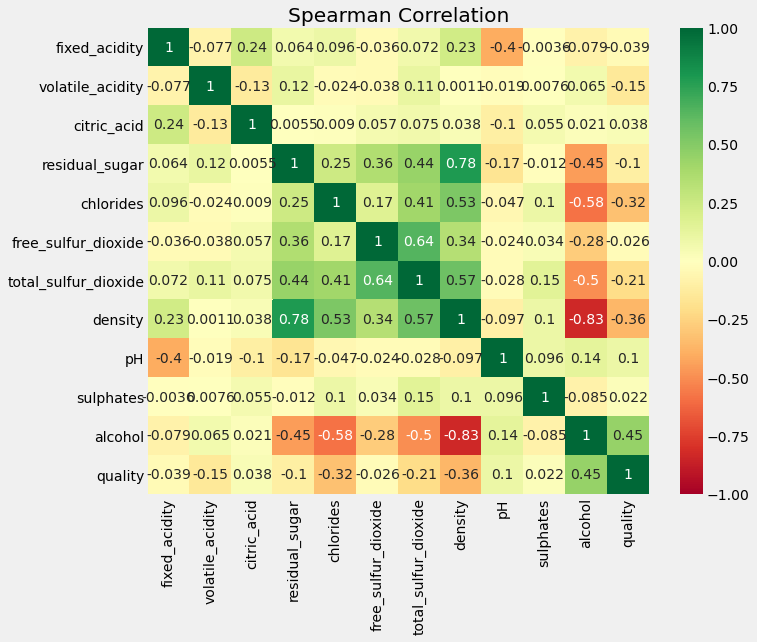

In [63]:
corr_pearson = df.corr(method='pearson')
corr_spearman = df.corr(method='spearman')

fig = plt.figure(figsize = (10,8))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (10,8))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()